In [53]:
%matplotlib inline

## Kaggle Expedia Contest Trial For BOUN SWE 546 Class

The [Expedia Hotel Recommendations](https://www.kaggle.com/c/expedia-hotel-recommendations/data) is a Kaggle Competition that started at 15 April 2016. Expedia wants Kaggle users to contextualize customer data and predict the likelihood a user will stay at 100 different hotel groups.

### Data Information

#### hotel_cluster

- Hotel clusters made of of similar hotels. Similarity not belong to [geographical locations](https://www.kaggle.com/c/expedia-hotel-recommendations/forums/t/20819/clusters-and-countries). Those clusters are based on popularity, star rating, user review rating, price etc. Also hotel clusters may be differs by seasonality.
- Room types and services [did not](https://www.kaggle.com/c/expedia-hotel-recommendations/forums/t/20374/hotel-cluster) taken into account.
- hotel_cluster also can be changes from as they might be clicked/booked from a srch_destination_id differs like "New York and vicinity" or "Statue of Liberty".

#### is_booking

- Value of this column changes depending on the users action. If the hotel is booked its value is 1 and only clicked its value is 0.

#### srch_destination_id

- srch_destination_id is the id of the location where hotel search made. 

#### orig_destination_distance	

- Physical distance between a hotel and a customer at the time of search. A null means the distance could not be calculated


### Starting With Loading Required Libraries


In [54]:
import csv
#import time
#from collections import Counter

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import seaborn

### How many lines present in the file

In [55]:
#num_lines = sum(1 for line in open('train.csv'))
#print("Number of Lines: ", num_lines)

### Loading Training File

Preparing Training data file ("*train.csv*") to read by chunks of a million records.

In [56]:
# Note should be read randomly

train = pd.read_csv('train.csv',
                    dtype={'is_booking':int,'srch_destination_id':np.int32, 'hotel_cluster':np.int32},
                    usecols=['srch_destination_id','is_booking','hotel_cluster','user_id','is_mobile'
                             ,'user_location_country','user_location_region','user_location_city'
                             ,'srch_destination_type_id','hotel_continent','hotel_country','hotel_market'
                             ,'orig_destination_distance'],
                    nrows = 1000000)
# chunksize=1000000


Let's look at data.

In [57]:
train.head(20)

,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,srch_destination_id,srch_destination_type_id,is_booking,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,66,348,48862,2234.2641,12,0,8250,1,0,2,50,628,1
1,66,348,48862,2234.2641,12,0,8250,1,1,2,50,628,1
2,66,348,48862,2234.2641,12,0,8250,1,0,2,50,628,1
3,66,442,35390,913.1932,93,0,14984,1,0,2,50,1457,80
4,66,442,35390,913.6259,93,0,14984,1,0,2,50,1457,21
5,66,442,35390,911.5142,93,0,14984,1,0,2,50,1457,92
6,66,189,10067,NaN,501,0,8267,1,0,2,50,675,41
7,66,189,10067,NaN,501,0,8267,1,0,2,50,675,41
8,66,189,10067,NaN,501,0,8267,1,0,2,50,675,69
9,66,189,10067,NaN,501,0,8267,1,0,2,50,675,70


Aggregating Search Destinations, Hotel Clusters and Users and booking combinations. 

In [58]:
groupped = train.groupby(['srch_destination_id','hotel_cluster','user_id','is_mobile'
                             ,'user_location_country','user_location_region','user_location_city'
                             ,'srch_destination_type_id','hotel_continent','hotel_country','hotel_market'])



In [59]:
grouppedDescribe = groupped['is_booking'].agg([np.sum, np.mean, np.std, len])
print(grouppedDescribe)

                                                                                                                                                                                       sum  \
srch_destination_id hotel_cluster user_id is_mobile user_location_country user_location_region user_location_city srch_destination_type_id hotel_continent hotel_country hotel_market        
1                   20            474090  0         71                    0                    17797              3                        5               76            1537            0   
                    30            474090  0         71                    0                    17797              3                        5               76            1537            0   
                    60            474090  0         71                    0                    17797              3                        5               76            1537            0   
4                   22            146060  1       

In [60]:
grouppedDescribe.transpose()

srch_destination_id        1                         4                        \
hotel_cluster                 20      30      60        22        25      30   
user_id                  474090  474090  474090    146060    671593  187010    
is_mobile                      0       0       0         1         0       0   
user_location_country        71      71      71        66        214     66    
user_location_region         0       0       0         174       118     448   
user_location_city         17797   17797   17797     32942     25424   47357   
srch_destination_type_id       3       3       3         1         1       1   
hotel_continent                5       5       5         6         6       6   
hotel_country                76      76      76        7         7       7     
hotel_market                1537    1537    1537      246       246     246    
sum                            0       0       0  1.000000  1.000000       0   
mean                           0       0       0  0.500000  0.500000       0   
std                            0     NaN       0  0.707107  0.707107       0   
len                            2       1       2  2.000000  2.000000       3   

srch_destination_id                                         ...      65017  \
hotel_cluster                         32      38      40    ...         38   
user_id                  1070288 187010  1070288 113144     ...    73859     
is_mobile                      0       0       0       0    ...          0   
user_location_country        23      66      23      214    ...        1     
user_location_region         48      448     48      121    ...        363   
user_location_city         4924    47357   4924    26481    ...      45521   
srch_destination_type_id       1       1       1       1    ...          6   
hotel_continent                6       6       6       6    ...          6   
hotel_country                7       7       7       7      ...        105   
hotel_market                246     246     246     246     ...       942    
sum                            0       0       0       0    ...          0   
mean                           0       0       0       0    ...          0   
std                          NaN     NaN       0     NaN    ...        NaN   
len                            1       1       2       1    ...          1   

srch_destination_id        65026     65031     65035                   65039  \
hotel_cluster                 76        28        10      35      36      67   
user_id                  127354    1154991   2451    2451    2451    490762    
is_mobile                      0         0         0       0       0       0   
user_location_country        66        66        3       3       3       66    
user_location_region         404       352       64      64      64      356   
user_location_city         48127     30279     9448    9448    9448    38434   
srch_destination_type_id       6         6         6       6       6       3   
hotel_continent                2         2         6       6       6       3   
hotel_country                50        50        105     105     105     3     
hotel_market                550       550       29      29      29      1564   
sum                            0  1.000000  1.000000       0       0       0   
mean                           0  0.333333  0.142857       0       0       0   
std                          NaN  0.577350  0.377964     NaN     NaN     NaN   
len                            1  3.000000  7.000000       1       1       1   

srch_destination_id        65063     65102            
hotel_cluster                 82        7         51  
user_id                  878665    1164199   1164199  
is_mobile                      0         0         0  
user_location_country        182       66        66   
user_location_region         403       318       318  
user_location_city         36983     41211     41211  
srch_destination_type_id       6         6

Let's visualize data.

#### Top 100 Search Destinations

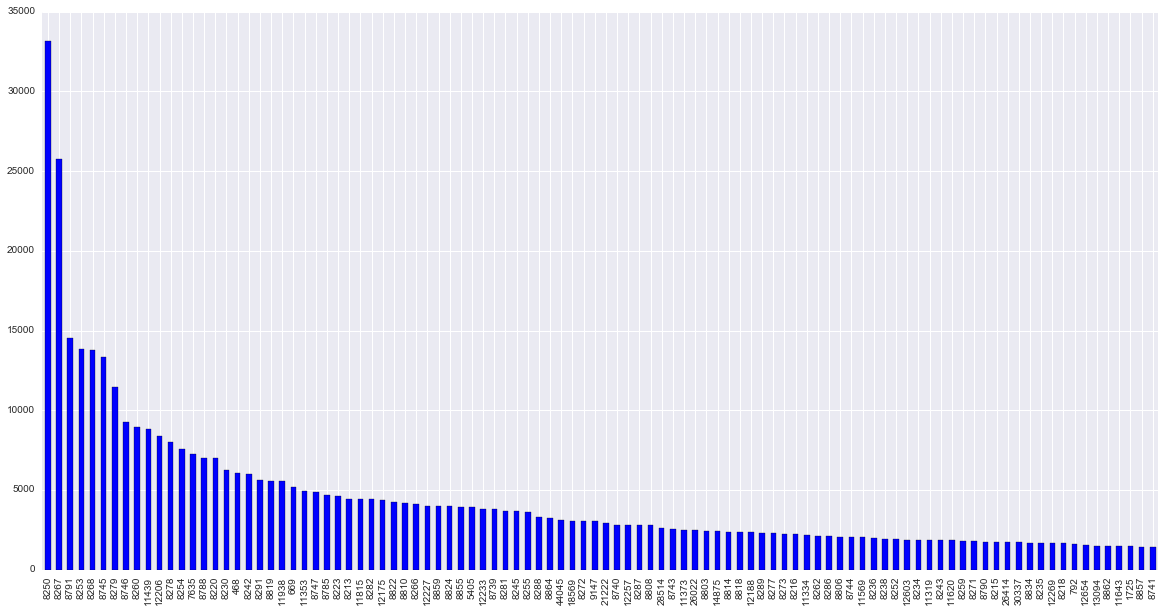

In [61]:
srch_destination_ids = train[['srch_destination_id']].stack().value_counts()
srch_destination_ids = srch_destination_ids[:100]

srch_destination_ids.plot(kind="bar", figsize=(20,10));

#### Top 100 Hotel Clusters

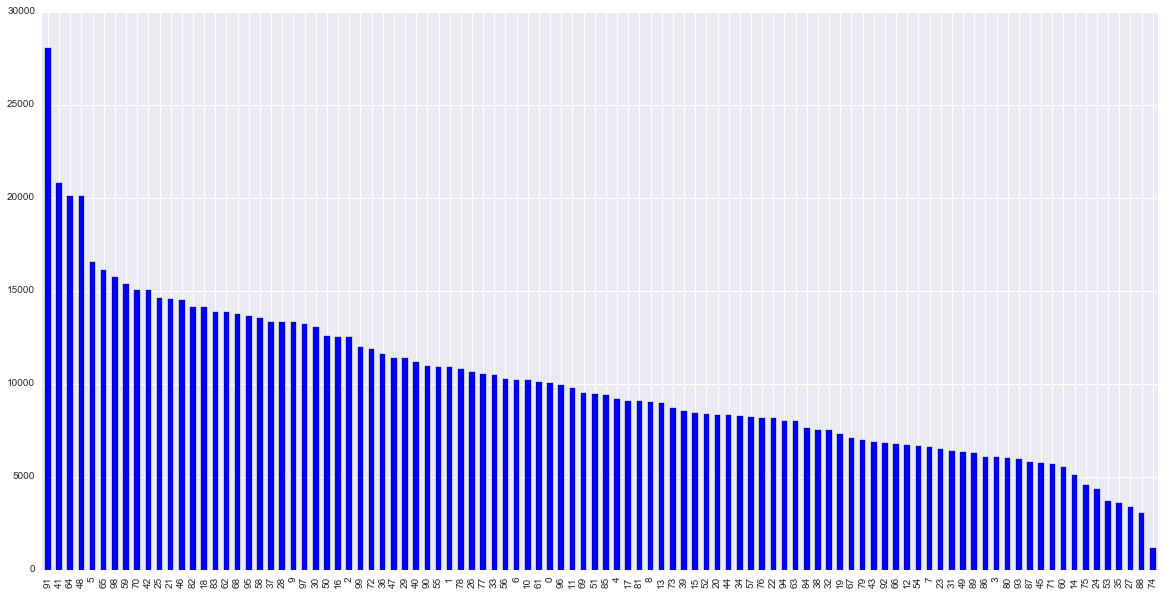

In [62]:
hotel_clusters = train[['hotel_cluster']].stack().value_counts()
hotel_clusters = hotel_clusters[:100]

hotel_clusters.plot(kind="bar", figsize=(20,10));

#### Mobility

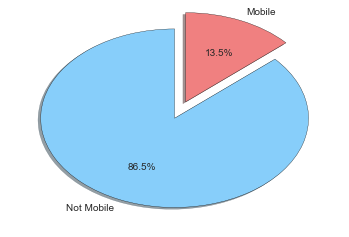

In [63]:
labels = 'Not Mobile', 'Mobile'
colors = ['lightskyblue', 'lightcoral'] 
explode = (0, 0.2)    

is_mobile = train[['is_mobile']].stack().value_counts()
plt.pie(is_mobile, explode=explode,labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90);

#### Hotel Continents

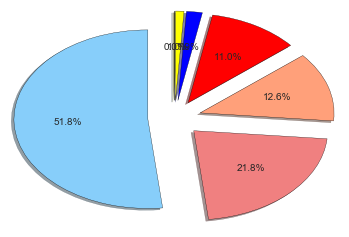

In [64]:
colors = ['lightskyblue', 'lightcoral', 'lightsalmon','red', 'blue', 'yellow'] 
explode = (0.2 , 0.2, 0.2, 0.2, 0.2, 0.2, 0.2)    

hotel_continent = train[['hotel_continent']].stack().value_counts()
plt.pie(hotel_continent, explode=explode, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90);


#### Top 10 User Country

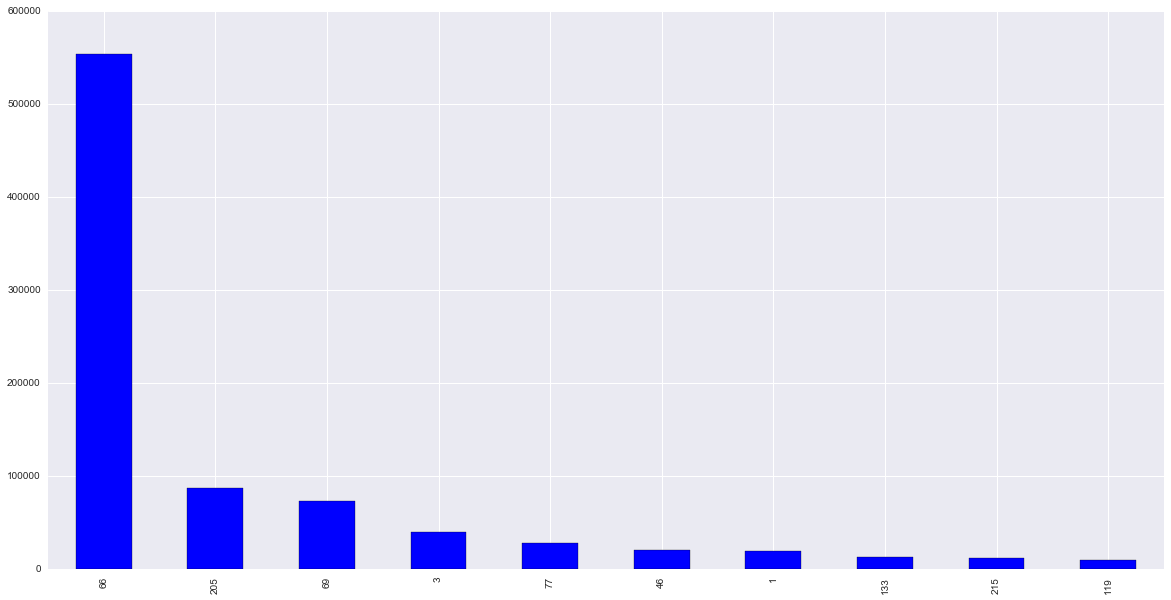

In [65]:
user_location_country = train[['user_location_country']].stack().value_counts()
user_location_country = user_location_country[:10]

user_location_country.plot(kind="bar", figsize=(20,10));

#### Top 10 Hotel Country

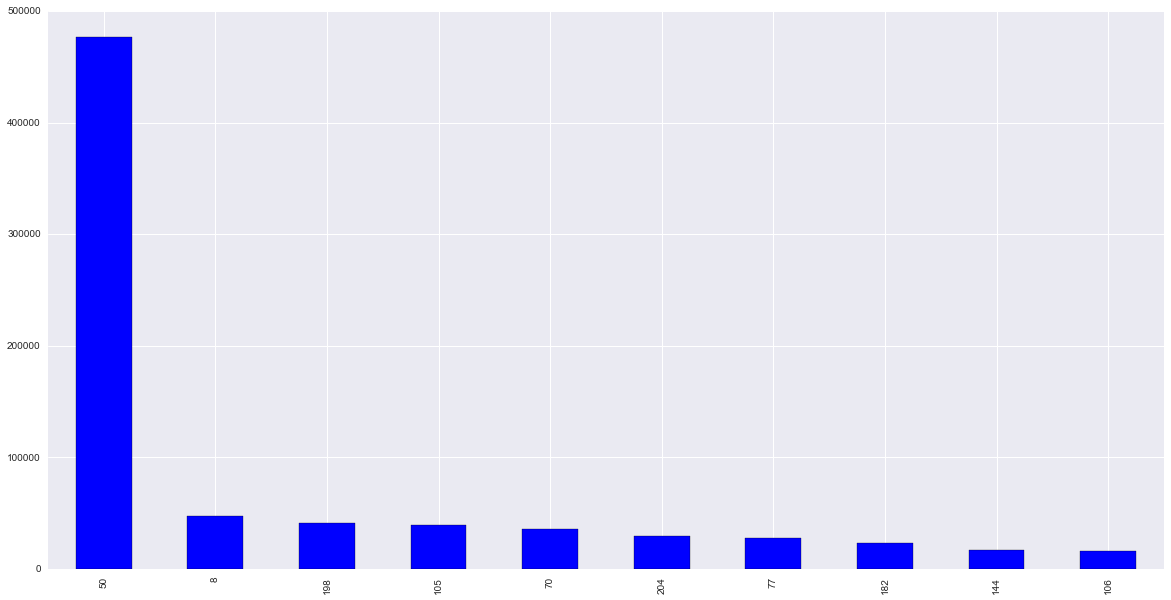

In [66]:
hotel_country = train[['hotel_country']].stack().value_counts()
hotel_country = hotel_country[:10]

hotel_country.plot(kind="bar", figsize=(20,10));

#### Top 20 Hotel Clusters

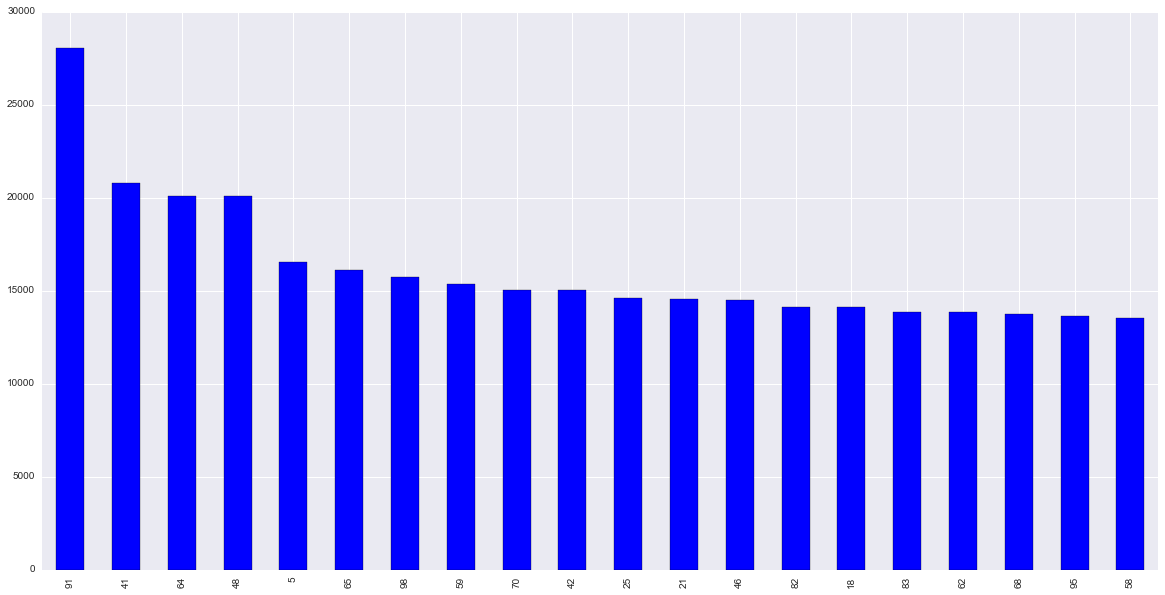

In [67]:
hotel_cluster = train[['hotel_cluster']].stack().value_counts()
hotel_cluster = hotel_cluster[:20]

hotel_cluster.plot(kind="bar", figsize=(20,10));

#### Top 20 User Location Region

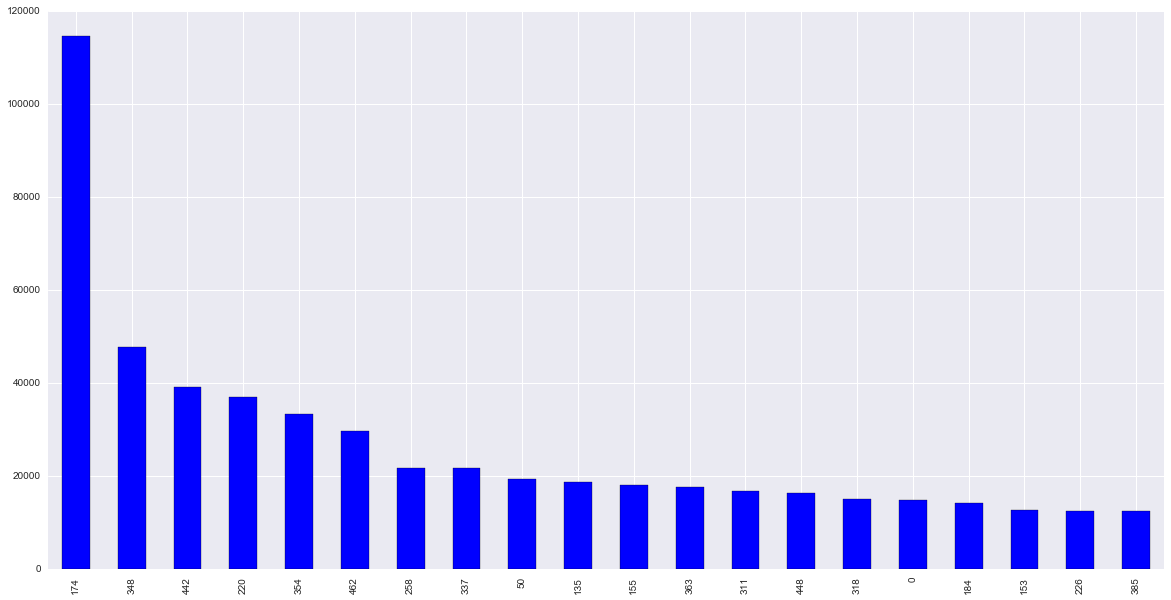

In [68]:
user_location_region = train[['user_location_region']].stack().value_counts()
user_location_region = user_location_region[:20]

user_location_region.plot(kind="bar", figsize=(20,10));

#### Search Destination Types

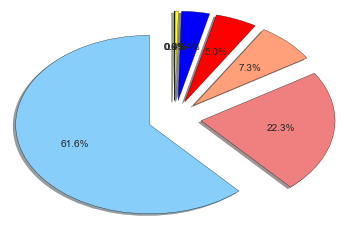

In [69]:
colors = ['lightskyblue', 'lightcoral', 'lightsalmon','red', 'blue', 'yellow'] 
explode = (0.2 , 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2)    

srch_destination_type_id = train[['srch_destination_type_id']].stack().value_counts()
plt.pie(srch_destination_type_id, explode=explode, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90);

#### Top 50 Hotel Market Types

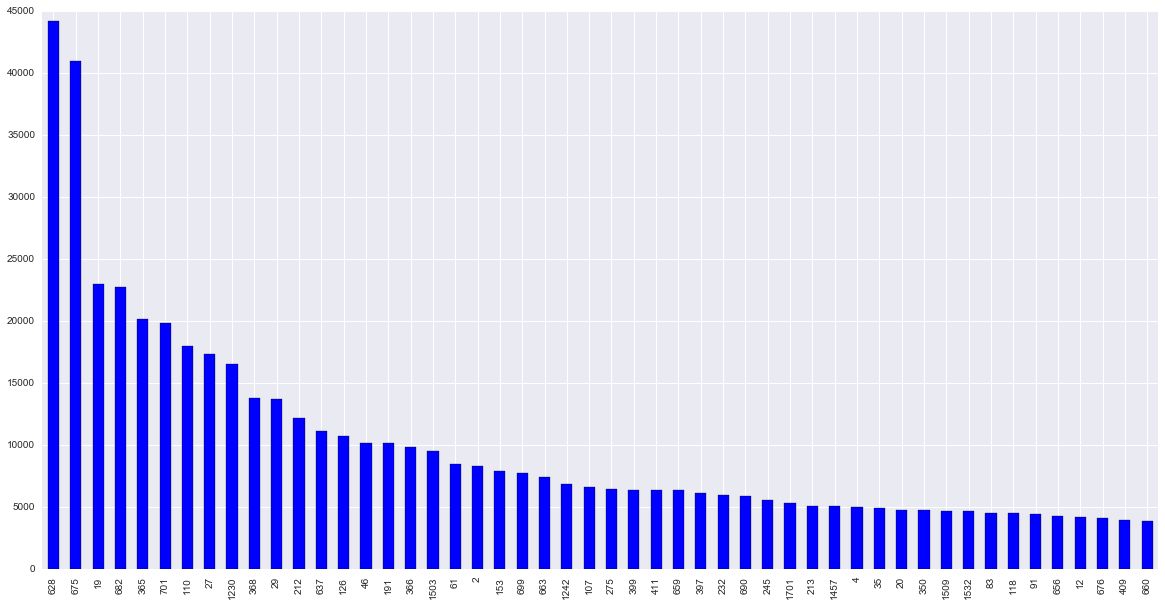

In [70]:
hotel_market = train[['hotel_market']].stack().value_counts()
hotel_market = hotel_market[:50]

hotel_market.plot(kind="bar", figsize=(20,10));


### Aggregation 

#### Aggregation of Mobility and Booking

In [71]:
bymobility = train.groupby(['is_mobile','is_booking'])
bymobility['is_booking'].agg([len])

len
is_mobile is_booking        
0         0           791056
          1            74088
1         0           126848
          1             8008

#### Aggregation of Hotel Country and Booking

In [72]:
byhotel_country = train.groupby(['hotel_country','is_booking'])
byhotel_country['is_booking'].agg([len]).head(20)

len
hotel_country is_booking       
0             0            1628
              1             145
1             0             420
              1              33
2             0             150
              1              12
3             0             183
              1              25
4             0             299
              1              33
5             0            8052
              1             311
6             0               2
7             0            2490
              1             264
8             0           45008
              1            2044
9             0             167
              1              18
10            0              57

#### Aggregation of User&Hotel Country and Distance

In [75]:
byHotelUserCountry = (train.groupby(['user_location_country','hotel_country'])
            ['orig_destination_distance']
            .agg(['min','mean','max','count']))
byHotelUserCountry.sort_values(by='count', ascending=False).head(50)

min         mean         max  \
user_location_country hotel_country                                       
66                    50                0.0056   860.307373   5156.8218   
                      8                 6.8803  1529.006669   4628.7712   
205                   50                2.9126  1360.296732   5812.7800   
                      198               0.0056   484.961579   3113.8813   
66                    105            3711.2246  5138.613707   8139.4052   
                      198              14.9022  1001.316489   5008.3659   
                      204            3305.8190  4669.791922   7857.2748   
                      70             2935.4782  4394.125005   7238.5294   
                      163             722.6241  1880.880336   4778.3893   
                      77             3101.6729  4655.232893   7930.5520   
77                    50             4668.3114  8117.942024  11679.2162   
66                    51              978.1637  1996.219165   3764.0663   
77                    63                0.0793   661.430207   2319.4878   
66                    47              523.8578  1671.673416   4509.8008   
1                     105               0.0766   222.188807    730.5410   
66                    144            3516.6435  4896.757684   7700.0676   
205                   8              1172.6972  2245.961317   3458.2691   
46                    50             3546.1592  5028.564177   7703.4875   
205                   105            3435.7979  4720.015444   5870.0233   
215                   50               59.9479  1411.508107   3804.3315   
66                    106            3852.8165  5918.494898   7661.7080   
                      182            6603.9241  8657.192420  10123.8458   
                      146            1073.7262  2329.090416   4941.2367   
                      128              58.5090  1321.962310   3006.4442   
215                   8                 0.1894   455.140957   1829.7483   
1                     50             3773.2859  4768.244452   8061.0775   
66                    99             5230.7194  6935.748884   8975.5324   
46                    144               0.0060   197.404405    500.7198   
205                   70             2603.9656  3793.877952   4775.2711   
66                    208            4476.6131  5876.996521   8467.0352   
205                   77             2804.8398  4336.629829   5549.6752   
1                     77              372.0573   878.599272   2096.1656   
77                    5               789.7072  2463.448877   3887.2852   
182                   50             2412.8529  4877.023992   8472.7325   
66                    96             1125.2483  2180.460957   5703.1220   
205                   204            2966.0766  4018.046307   5459.4958   
66                    68             3348.1059  4426.348805   5605.8070   
                      171            5454.3113  7595.454219   8989.2318   
                      31             2732.5920  3850.910768   7014.6783   
                      82             5202.4883  7583.038995   9318.3477   
46                    77              530.9316   968.459170   2206.9231   
66                    63             4693.5971  8605.847956  11635.9476   
1                     204              59.7501   522.490692   1009.8776   
66                    22             4745.8204  5786.580466   7159.5482   
                      32             1100.5575  2048.333692   5954.8368   
                      46             3614.5155  4805.885067   5982.5889   
                      119             919.2453  2326.178870   5707.6268   
77                    182            2613.5785  4205.654542   5014.1220   
1                     70              539.3430   813.780382   1329.8884   
66                    104            6783.0408  8082.573889   9493.4286   

                                      count  
user_location_country hotel_country          
66                    50             323353  
    

#### Aggregation of User&Hotel Country and Booking

In [80]:
byHotelUserCountryBooking = byhotel_country = train.groupby(['user_location_country','hotel_country','is_booking'])
byHotelUserCountryBooking['is_booking'].agg([len]).sort_values(by='len', ascending=False).head(50)

len
user_location_country hotel_country is_booking        
66                    50            0           331101
                                    1            36725
                      8             0            34758
205                   50            0            31884
                      198           0            20608
69                    50            0            13199
66                    105           0            12371
                      198           0            11610
69                    70            0            10261
66                    204           0             9755
                      163           0             9001
                      70            0             8728
3                     50            0             6711
69                    77            0             6089
66                    77            0             5900
77                    50            0             5742
                      63            0             5051
66                    51            0             5046
69                    105           0             4922
66                    47            0             4575
215                   50            0             4446
46                    50            0             4104
205                   8             0             3780
1                     105           0             3747
3                     182           0             3649
69                    204           0             3642
66                    144           0             3601
215                   8             0             3520
3                     106           0             3425
205                   105           0             3371
                      198           1             3025
66                    106           0             2939
                      182           0             2924
                      128           0             2841
                      146           0             2740
46                    144           0             2709
3                     126           0             2643
205                   50            1             2596
66                    99            0             2324
1                     50            0             2324
23                    50            0             2280
119                   106           0             2249
77                    5             0             2220
69                    48            0             2211
                      144           0             2210
3                     105           0             2165
                      130           0             2056
70                    182           0             2034
66                    96            0             2023
133                   50            0             2022